### 1. Load CATPCHA images and get the transformed (X,y) data

In [1]:
import torch

from helper_functions.data_transformation import get_transformed_data_v2, get_transformed_data_for_captcha_evaluation

train_folder = "../data/train/combine"
test_folder = "../data/test/combine"
cached_data_path = "../data/prepared_data_cnn_v2.pth"

try:
    # Load the prepared data from cache if it already exists
    X_train, y_train, X_test, y_test, X_test_captcha, y_test_captcha, failed_segmentation_info = torch.load(cached_data_path)
    print("Loaded prepared data from cache.")

except FileNotFoundError:
    # Else prepare the data and save it
    X_train, y_train = get_transformed_data_v2(train_folder, is_train=True)
    X_test, y_test = get_transformed_data_v2(test_folder, is_train=False)
    X_test_captcha, y_test_captcha, failed_segmentation_info = get_transformed_data_for_captcha_evaluation(test_folder)

    torch.save((X_train, y_train, X_test, y_test, X_test_captcha, y_test_captcha, failed_segmentation_info), cached_data_path)
    print("Saved prepared data to cache.")


Loaded prepared data from cache.


### 2. Instantiate basic CNN model and train it

In [2]:
from models.cnn_v3 import CNN, CNNParams
from helper_functions.data_transformation import IMG_HEIGHT, IMG_WIDTH


# Instantiate model
cnn_params: CNNParams = {
    "num_classes": 36,
    "input_shape": (1, IMG_HEIGHT, IMG_WIDTH), # (channels, height, width)
    "learning_rate": 1.1*1e-3,
    "num_epochs": 30,
    "batch_size": 250,
}
cnn = CNN(cnn_params)

# Train model
cached_model_path = "../trained_models/cnn_v3_90.pth"
try:
    # Load the trained model from cache if it already exists
    cnn.load_trained_model(cached_model_path)
except FileNotFoundError:
    # Else train the model and save it
    cnn.train_model(X_train, y_train)
    cnn.save_trained_model(cached_model_path)


Trained model (took 15m 17s) has the saved epoch losses: 
Epoch 1, Loss: 1.43350078827805
Epoch 2, Loss: 0.7170873795532517
Epoch 3, Loss: 0.576430232781503
Epoch 4, Loss: 0.48965783955322373
Epoch 5, Loss: 0.4162476257317596
Epoch 6, Loss: 0.36232245144330794
Epoch 7, Loss: 0.3190268837950296
Epoch 8, Loss: 0.28570416911194724
Epoch 9, Loss: 0.247991813864145
Epoch 10, Loss: 0.22820320140777361
Epoch 11, Loss: 0.2008281679203113
Epoch 12, Loss: 0.17529828054830432
Epoch 13, Loss: 0.16118246648046705
Epoch 14, Loss: 0.14715543761849403
Epoch 15, Loss: 0.09451264318906599
Epoch 16, Loss: 0.07218176502889644
Epoch 17, Loss: 0.06341813195548537
Epoch 18, Loss: 0.05815427851242324
Epoch 19, Loss: 0.055443560445888176
Epoch 20, Loss: 0.04130509583693412
Epoch 21, Loss: 0.036342462815809995
Epoch 22, Loss: 0.03443375051332017
Epoch 23, Loss: 0.030837552764246032
Epoch 24, Loss: 0.024537081151114155
Epoch 25, Loss: 0.021902835649800383
Epoch 26, Loss: 0.02062314746823783
Epoch 27, Loss: 0.019

### 3. Evaluate CNN model

Character level performance (skipping SF): {
  "accuracy": 0.901,
  "precision": 0.903,
  "recall": 0.899,
  "f1_score": 0.9
}

Captcha level performance: {
  "segmentation_accuracy": 0.909,
  "captcha_accuracy (skipping SF)": 0.623,
  "captcha_accuracy (including SF)": 0.566,
  "character_accuracy (including SF)": 0.817
}

Confusion matrix for individual characters (skipping SF):


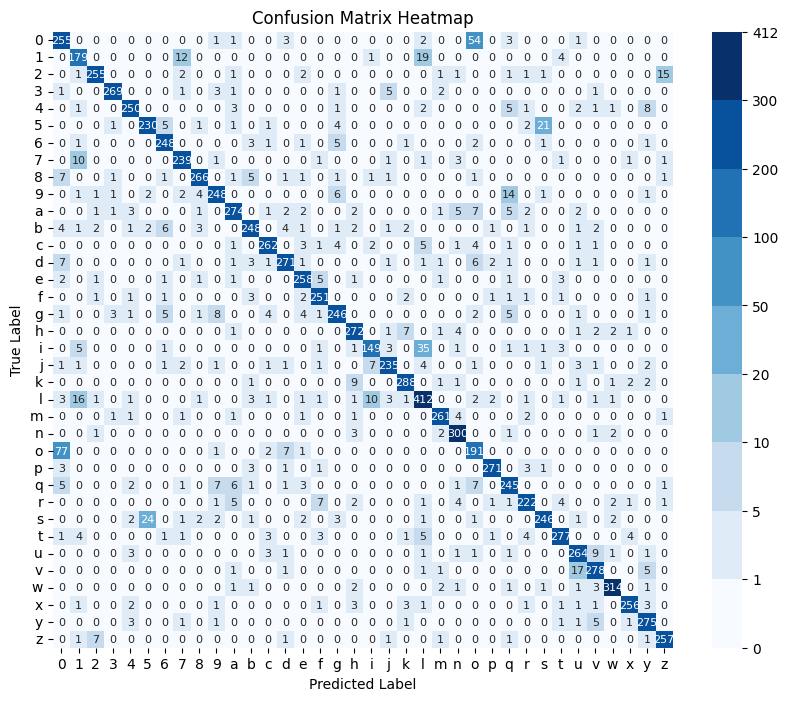

Individual character performance and top confusions (skipping SF):


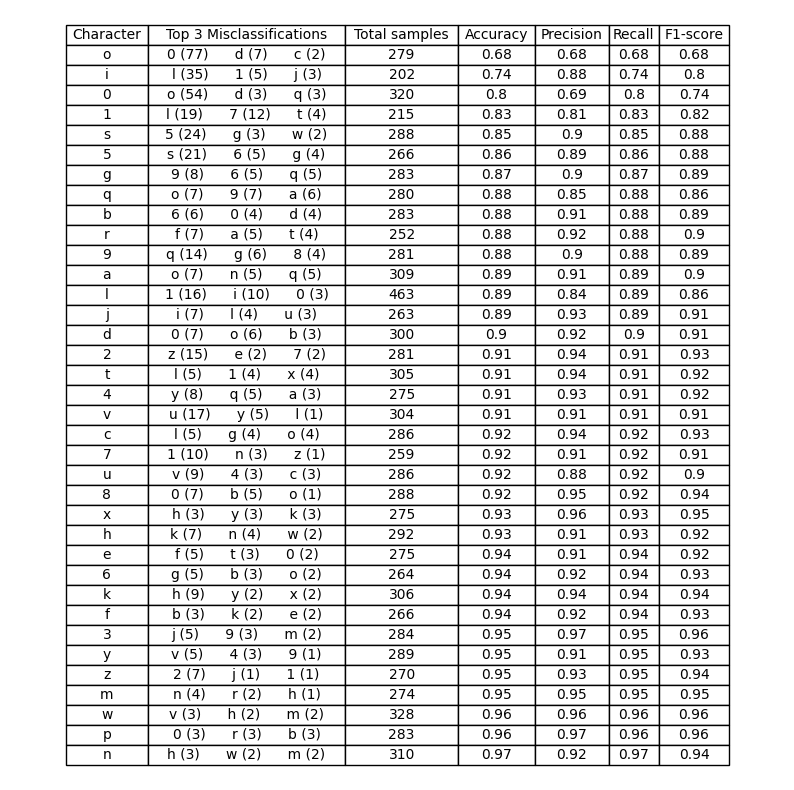

In [3]:
from helper_functions.evaluation import evaluate_character_performance, evaluate_captcha_performance, evaluate_individual_character_performance

evaluate_character_performance(cnn.model, X_test, y_test)
evaluate_captcha_performance(cnn.model, X_test_captcha, y_test_captcha, failed_segmentation_info)
evaluate_individual_character_performance(cnn.model, X_test, y_test)